# **` Fraud Detection and Actionable Insights: Leveraging Predictive Modeling for Financial Security`**





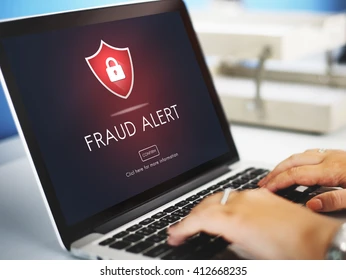

# 1.   Importing the necessary libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Collecting the Data

DATASET LINK (for local machine): https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data =pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# 3. Data Cleaning

### data contains 6cr+ Rows with 11 Columns

In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


there is no any duplicate values in dataset

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(6362620, 11)

### Checking NULL values ------------>

In [9]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Unique values by each column

In [10]:
data.nunique(axis=0)

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

### Target column summary

In [11]:
data['isFraud'].unique()

array([0, 1])

In [12]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# 4. Data Analysis & Visualization

## Obervation -1

In [13]:
legal_transactions = len(data[data.isFraud == 0])
fraud_transactions = len(data[data.isFraud == 1])
legal_percent = (legal_transactions / (fraud_transactions + legal_transactions)) * 100
fraud_percent = (fraud_transactions / (fraud_transactions + legal_transactions)) * 100

In [14]:
print("Number of Legal transactions: ", legal_transactions)
print("Number of Fraud transactions: ", fraud_transactions)
print("Percentage of Legal transactions: {:.4f} %".format(legal_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legal transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legal transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


## Conclusion

#### the analysis reveals that the dataset predominantly consists of legal transactions, accounting for 99.8709% of the total entries, while fraudulent transactions represent a minimal percentage at 0.1291%. This emphasizes the importance of developing robust fraud detection systems to effectively identify and mitigate the relatively rare instances of fraudulent activity within financial transactions.



---



---



---



## Observation-2

In [15]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

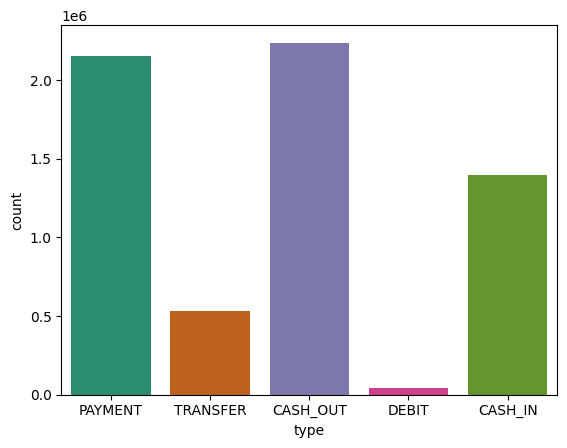

In [16]:
sns.countplot(x=data['type'] , data=data ,palette = "Dark2"  )


## Conclusion

#### In summary, the analysis indicates that the most common types of transactions in the dataset are "CASH_OUT" and "PAYMENT," followed by "CASH_IN" and "TRANSFER," while "DEBIT" transactions are the least frequent. Understanding these transaction patterns is crucial for designing targeted fraud detection strategies and optimizing financial operations.

## Observation -3

In [17]:
series=data.groupby('type')['amount'].sum()

In [18]:
series.sort_values(ascending=False)

type
TRANSFER    4.852920e+11
CASH_OUT    3.944130e+11
CASH_IN     2.363674e+11
PAYMENT     2.809337e+10
DEBIT       2.271992e+08
Name: amount, dtype: float64

In [19]:
series_df=pd.DataFrame(series)

In [20]:
series_df

,amount
type,
CASH_IN,2.363674e+11
CASH_OUT,3.944130e+11
DEBIT,2.271992e+08
PAYMENT,2.809337e+10
TRANSFER,4.852920e+11


<Axes: xlabel='type', ylabel='amount'>

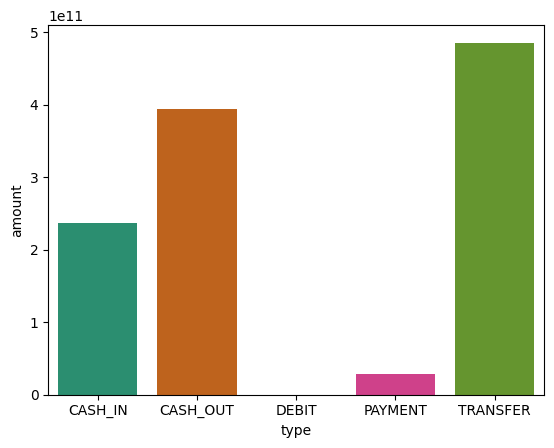

In [21]:
sns.barplot(x="type" , y="amount" , data=series_df ,palette = "Dark2" )

#### "TRANSFER" type has  highest sum of amount followed by "CASH_OUT"



---



---



---



## Observation-4

In [22]:
series=data.groupby('isFraud')['amount'].sum()

In [23]:
series_df=pd.DataFrame(series)

In [24]:
series_df

,amount
isFraud,
0,1.132337e+12
1,1.205642e+10


<Axes: xlabel='isFraud', ylabel='amount'>

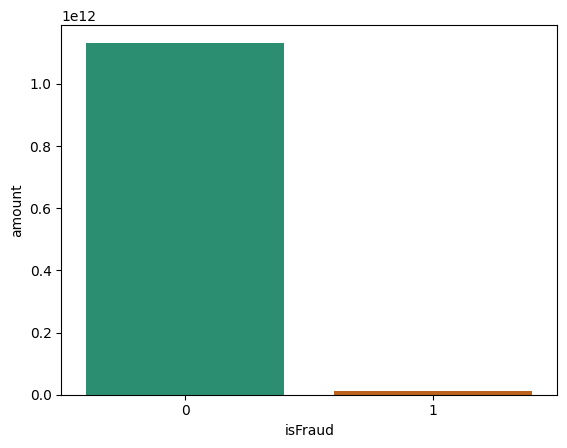

In [25]:
sns.barplot(x='isFraud' , y='amount' , data=series_df , palette = "Dark2")

## Conclusion

#### Total of Fraud amount =1205.642 crore
#### Total of legal amount= 11323370 crore



---



---



---



## Observation-5

In [26]:
fraud_df=data[data['isFraud']==1]

In [27]:
fraud_df['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

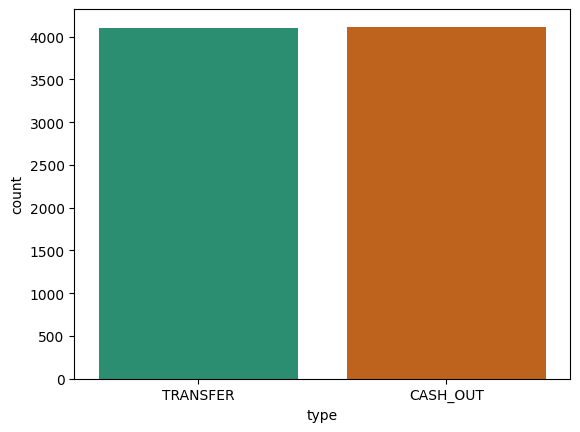

In [28]:
sns.countplot(x=fraud_df['type'] , data=fraud_df ,palette = "Dark2"  )

In [29]:
series=fraud_df.groupby('type')['amount'].sum()

In [30]:
series_df=pd.DataFrame(series)

In [31]:
series_df

,amount
type,
CASH_OUT,5.989202e+09
TRANSFER,6.067213e+09


<Axes: xlabel='type', ylabel='amount'>

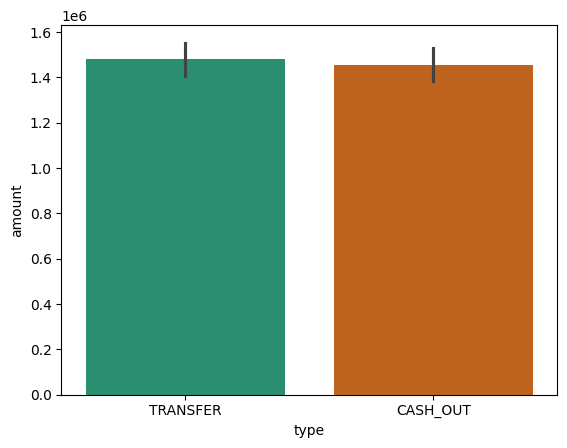

In [32]:
sns.barplot(x="type" , y="amount" , data=fraud_df ,palette = "Dark2" )

## Conclusion

#### Fraud transactions contains only 2 amount type "TRANSFER" & "CASH_OUT" and both are same
#### Total fraud amount of the the type are also same



---



---



---



<Axes: >

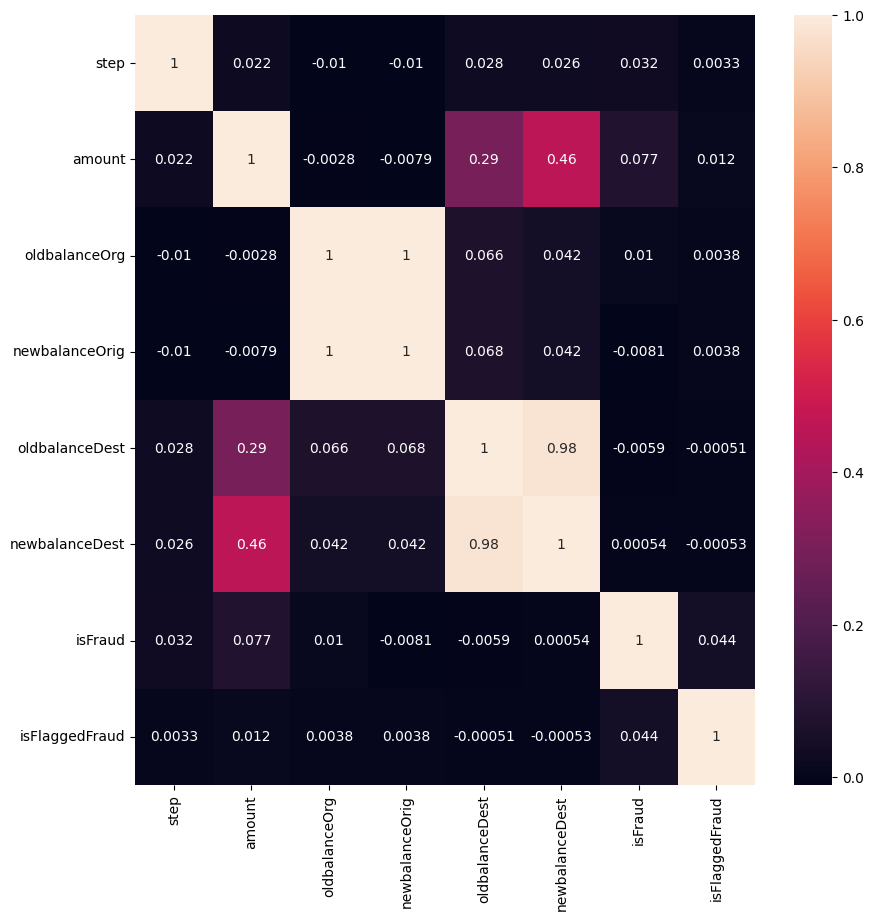

In [33]:
corr=data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 5. Data Pre-Processing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [35]:
data.nunique(axis=0)

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

#### Here we are dropping some of the columns because these columns will not create an major impact on the accuracy because there are many unique values in the column where dtype is "object"

#### These columns are 'step', 'nameOrig', 'nameDest', 'isFlaggedFraud'

In [36]:
data1=data.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [37]:
data1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [38]:
le=LabelEncoder()

In [39]:
data1['type']=le.fit_transform(data1['type'])

In [40]:
data1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,4,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,4,850002.52,850002.52,0.00,0.00,0.00,1


In [41]:
x=data1.drop('isFraud' , axis=1)

In [42]:
y=data1['isFraud']

In [43]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [44]:
x_train , x_test , y_train , y_test = train_test_split( x_scaled , y , test_size=0.2 , random_state=42)

In [45]:
x_train.shape

(5090096, 6)

In [46]:
y_train.shape

(5090096,)

# 6. Creating Model

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assume X_train, X_test, y_train, y_test are your training and testing data

# Define a list of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),

}

# Train each model and calculate accuracy
accuracies = {}
for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy in dictionary
    accuracies[name] = accuracy

# Find the model with highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("Model accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy}")

print(f"\nBest model: {best_model} with accuracy: {best_accuracy}")



Model accuracies:
Logistic Regression: 0.9991685814963018
Decision Tree: 0.999746959585831

Best model: Decision Tree with accuracy: 0.999746959585831


# 7. Evaluation

In [71]:
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1270747,     157],
       [    165,    1455]])

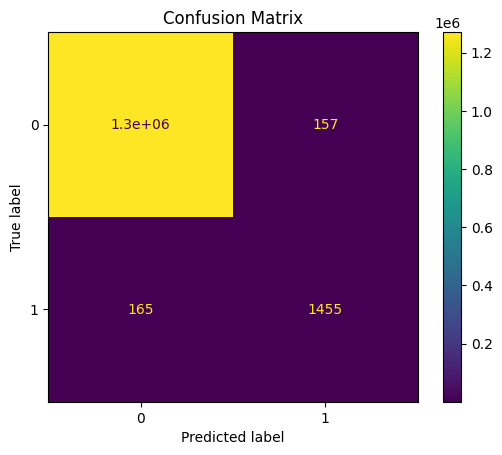

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [53]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

##### Accuracy

In [54]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.999746959585831

##### Precision

In [55]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9998764658857002

##### Recall

In [57]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.999870171970994

##### F-Beta score

In [58]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9998733189184426

##### ROC-AUC Curve

In [62]:
from sklearn.metrics import  roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.9490123070169242

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

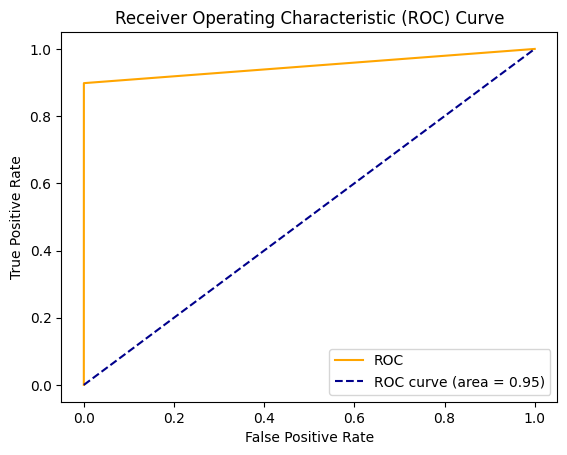

In [65]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Ideal ROC-Curve condition:
In general, an AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

##### Precision-Recall Curve

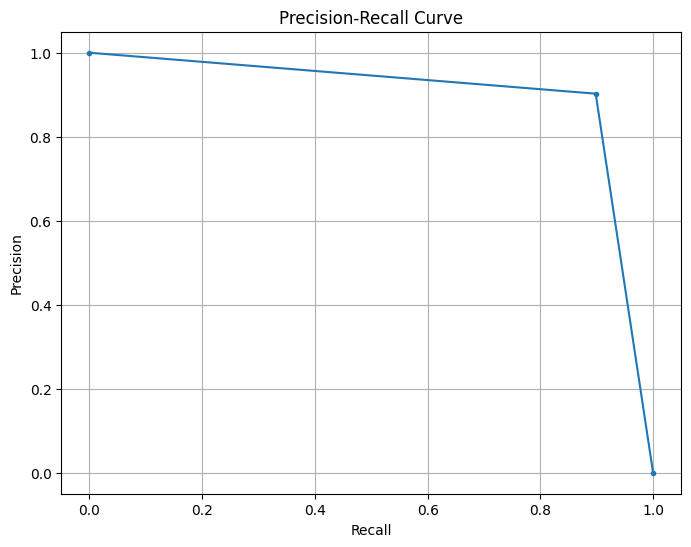

In [67]:
from sklearn.metrics import precision_recall_curve

# Assume y_true and y_scores are your true labels and predicted probabilities, respectively

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


Ideal PR-Curve condition:An ideal PR-curve goes from the topleft corner horizontically to the topright corner and straight down to the bottomright corner,

##### Calibration Curve

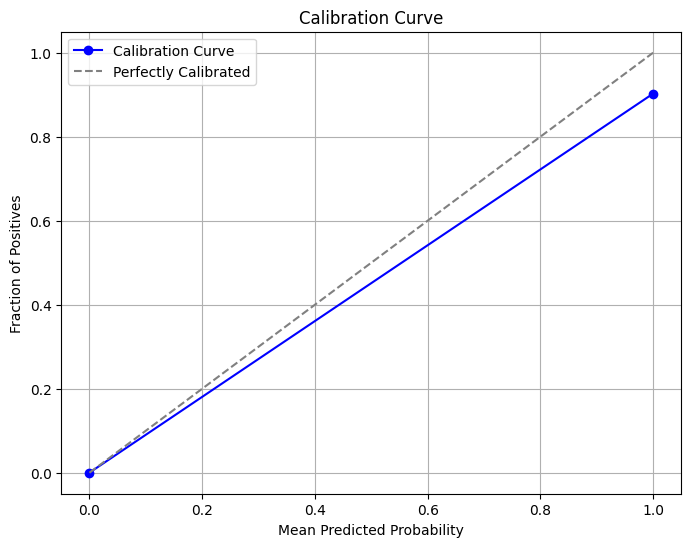

In [68]:
from sklearn.calibration import calibration_curve


# Assume y_true and y_probs are your true labels and predicted probabilities, respectively

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='blue', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


Ideal Calibration-Curve condition: The r or r2 values that accompany our calibration curve are measurements of how closely our curve matches the data we have generated.

# 8. Conclusion

### 1. Describe your fraud detection model in elaboration ?

1.**Data Collection:** The first step in building a fraud detection model is to gather relevant data. Here we are taking a data from kaggle website where the format of the data is csv.


---



2 **Data cleaning:** Once the data is collected, it needs to be preprocessed to prepare it for modeling. This involves tasks such as cleaning the data to handle missing values, outliers, and inconsistencies.


---



3.**Data Analysis & Visualization :**Finding the insights from the data , what data is actually telling us . Here we find 5 observations from the data.


---



4.**Data pre-processing :**This includes spliting the data, encoding categorical variables, scaling numerical features, and possibly feature engineering to create new informative features.



---


5.**Model Selection:** A variety of machine learning algorithms can be used for fraud detection, including but not limited to:
Logistic Regression,
Decision Trees,
Support Vectors Machines,
Gradient Boosting Machines,
The choice of algorithm depends on factors such as the nature of the data, the desired interpretability of the model, and the trade-off between accuracy and computational efficiency.


---




6.**Model Training:** The selected model is then trained on the preprocessed data. During training, the model learns patterns and relationships in the data that distinguish between legitimate and fraudulent transactions. This involves adjusting the model parameters to minimize a chosen loss function, typically using techniques like gradient descent or its variants.
here we are getting a accuracy of 0.999746959585831 with Decision Tree



---



7.**Model Evaluation:** Once trained, the model is evaluated on a separate test dataset to assess its performance. Common evaluation metrics for fraud detection models include accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix analysis. The model's performance is compared against predefined thresholds or benchmarks to determine its effectiveness in detecting fraud.








###2.How did you select variables to be included in the model?  

There are 11 varriables in the dataset this includes step, type , amount ,
nameOrig , oldbalanceOrg ,
newbalanceOrig ,
nameDest ,
oldbalanceDest ,
newbalanceDest , isFraud ,
isFlaggedFraud.
Some of the variables are not usefull to us while making a predictive model because this will not create a much impact on the accuracy.
we can check impact of the variables with the help of heatmap and multicollinearity. Those variables which have very less impact we can drop this variables this are step , nameOrig , isFlaggedFraud , nameDest.

### 3.Demonstrate the performance of the model by using best set of tools ?

1.**Model Training and Evaluation:**
Split the dataset into training and testing sets using train_test_split from scikit-learn.
Choose a suitable machine learning algorithm (e.g., logistic regression, decision tree, random forest, etc.).
Train the model on the training set using the chosen algorithm.
Evaluate the model's performance on the testing set using evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.


---


2.**Data Visualization:**
Use libraries like Matplotlib and Seaborn to create visualizations that illustrate the model's performance.
Plot confusion matrices, ROC curves, precision-recall curves,calibration-curve and feature importances to provide insights into the model's behavior and predictive capabilities.
Hyperparameter Tuning:

Utilize tools like GridSearchCV or RandomizedSearchCV from scikit-learn to perform hyperparameter tuning and find the best combination of hyperparameters for the model.
Cross-validate the model with different hyperparameter settings to ensure robustness and avoid overfitting.

### 4.What are the key factors that predict fraudulent customer?

### 5.What kind of prevention should be adopted while company update its infrastructure?

1.Utilize certified and reputable applications for system updates.

2.Ensure browsing exclusively on secure websites with HTTPS protocols.

3.Employ secure internet connections, such as VPNs, to safeguard data transmission.

4.Regularly update mobile and laptop security software to address emerging threats.

5.Exercise caution and refrain from responding to unsolicited communications via calls, SMS, or emails.

6.In the event of suspicion or security breaches, promptly contact financial institutions for immediate assistance.

### 6.Assuming these actions have been implemented, how would you determine if they work?

1.Monitor the frequency and content of electronic statements sent by the bank.

2.Encourage customers to regularly review their account activity for any discrepancies or unauthorized transactions.

3.Maintain a comprehensive log of all payments made, providing a record for verification and comparison purposes.

1.Request source security: Ensuring the security of request sources.

2.Legitimacy of requesting organization's name: Validating the legitimacy of the organization requesting money.

3.Vendor transaction history: Analyzing the transaction history of vendors.